# Análise de Dados de custos Médicos


**Problema**:
+ Avaliar a base de dados, fazer os devidos tratamentos e prever o custo dos planos médicos.

In [114]:
#Importando pandas e abrindo o arquivo database
import pandas as pd 
df = pd.read_csv('insurance.csv') 
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [115]:
#mostrando informações sobre o arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
#quantidade de pacientes por região 
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

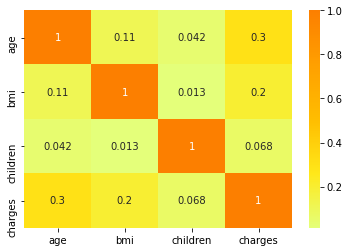

In [117]:
sns.heatmap(df.corr(), cmap = 'Wistia', annot =True)
plt.show()

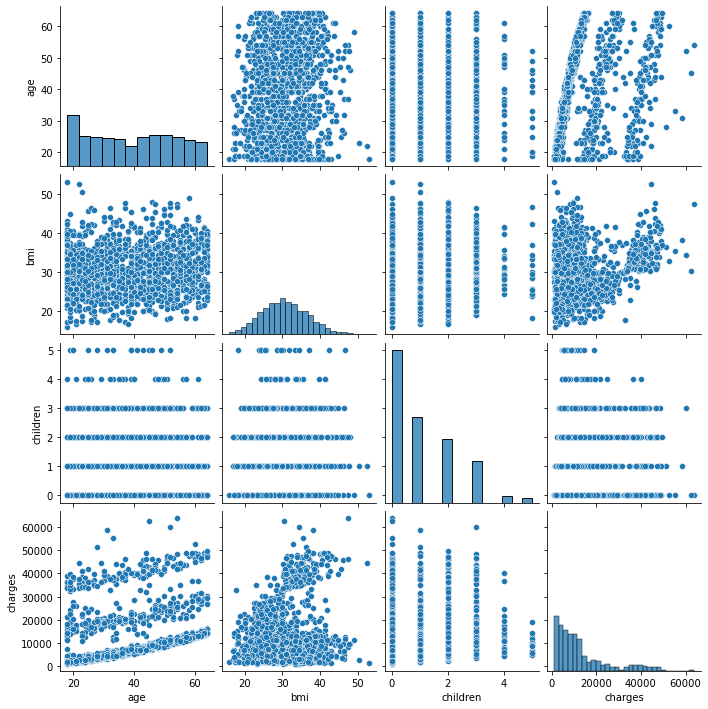

In [119]:
#gráfico para visualização das correlações
import seaborn as sns 
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()    

In [120]:
#visualizando a quantidade de fumantes e não fumantes
import plotly.express as px

fig = px.histogram(df, x='smoker', y= df.index.value_counts())
fig.show()

In [121]:
#quantidade de fumantes 
df['smoker'].value_counts()
df['smoker'].value_counts(normalize=True).map('{:.1%}'.format)

no     79.5%
yes    20.5%
Name: smoker, dtype: object

**Anotações importantes**
+ Base de dados está sem valores nulos neste caso não será necessário a exclusão de linhas
+ Variável alvo para predição será a coluna "charges" 
+ Os dados do tipo object passarão por uma transformação, irei criar colunas com as informações binárias. Exemplo a coluna "sex" será composta por 0(male) e 1(female). Assim o modelo de machine learning trabalhará da melhor forma.
+ a correlação maior está entre "age" e "charges" 
+ 79,5% das pessoas que possuem plano não são fumantes.

In [122]:
#Substituindo caracteres por números
df['sex']= df['sex'].map({'male':0, 'female':1})
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})

In [123]:
#criando colunas com as informações de região tornando as binárias
df.loc[df['region'] == 'southwest', 'reg_southwest'] = 1
df.loc[df['region'] == 'southeast', 'reg_southeast'] = 1
df.loc[df['region'] == 'northwest', 'reg_northwest'] = 1
df.loc[df['region'] == 'northeast', 'reg_northeast'] = 1

#substituindo valores nulos por 0
df.update(df['reg_southwest'].fillna(0))
df.update(df['reg_southeast'].fillna(0))
df.update(df['reg_northwest'].fillna(0))
df.update(df['reg_northeast'].fillna(0))
display(df)

,age,sex,bmi,children,smoker,region,charges,reg_southwest,reg_southeast,reg_northwest,reg_northeast
0,19,1,27.900,0,1,southwest,16884.92400,1.0,0.0,0.0,0.0
1,18,0,33.770,1,0,southeast,1725.55230,0.0,1.0,0.0,0.0
2,28,0,33.000,3,0,southeast,4449.46200,0.0,1.0,0.0,0.0
3,33,0,22.705,0,0,northwest,21984.47061,0.0,0.0,1.0,0.0
4,32,0,28.880,0,0,northwest,3866.85520,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0.0,0.0,1.0,0.0
1334,18,1,31.920,0,0,northeast,2205.98080,0.0,0.0,0.0,1.0
1335,18,1,36.850,0,0,southeast,1629.83350,0.0,1.0,0.0,0.0
1336,21,1,25.800,0,0,southwest,2007.94500,1.0,0.0,0.0,0.0


In [124]:
df['reg_southwest'] = df['reg_southwest'].astype(int)
df['reg_southeast'] = df['reg_southeast'].astype(int)
df['reg_northwest'] = df['reg_northwest'].astype(int)
df['reg_northeast'] = df['reg_northeast'].astype(int)
display(df)

,age,sex,bmi,children,smoker,region,charges,reg_southwest,reg_southeast,reg_northwest,reg_northeast
0,19,1,27.900,0,1,southwest,16884.92400,1,0,0,0
1,18,0,33.770,1,0,southeast,1725.55230,0,1,0,0
2,28,0,33.000,3,0,southeast,4449.46200,0,1,0,0
3,33,0,22.705,0,0,northwest,21984.47061,0,0,1,0
4,32,0,28.880,0,0,northwest,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0,0,1,0
1334,18,1,31.920,0,0,northeast,2205.98080,0,0,0,1
1335,18,1,36.850,0,0,southeast,1629.83350,0,1,0,0
1336,21,1,25.800,0,0,southwest,2007.94500,1,0,0,0


In [125]:
df = df.drop(columns='region', axis=0)
display(df)

,age,sex,bmi,children,smoker,charges,reg_southwest,reg_southeast,reg_northwest,reg_northeast
0,19,1,27.900,0,1,16884.92400,1,0,0,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0
2,28,0,33.000,3,0,4449.46200,0,1,0,0
3,33,0,22.705,0,0,21984.47061,0,0,1,0
4,32,0,28.880,0,0,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,0,1,0
1334,18,1,31.920,0,0,2205.98080,0,0,0,1
1335,18,1,36.850,0,0,1629.83350,0,1,0,0
1336,21,1,25.800,0,0,2007.94500,1,0,0,0


**Machine Learning**
+ Preparando os dados de treino e teste

In [126]:
#importando biblioteca para divisão dos dados
#importando bibliotecas para modelos de regressão, já que o que quero prever é o valor de custos.
from sklearn.model_selection import train_test_split

x= df.drop('charges', axis=1)
y= df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 4)

**Como o problema requer algoritmos de regressão irei utilizar os seguintes:**
+ Regressão Linear
+ Random Forest

**Para definir o valor de erros será utilizado:**
- o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vou olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [127]:
#bibliotecas para os modelos de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
import numpy as np

In [128]:
#Treino IA
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

#Teste IA 
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

#impressão dos resultados 
r2_lin = metrics.r2_score(y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f"R² da Regressão Linear:{r2_lin}")
print(f"RMSE da Regressão Linear: {rmse_lin}")

r2_rf = metrics.r2_score(y_test, test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f"R² da Random Forest:{r2_rf}")
print(f"RMSE da Random Forest: {rmse_rf}")

R² da Regressão Linear:0.7153818316333866
RMSE da Regressão Linear: 6397.27062457006
R² da Random Forest:0.8253705033716745
RMSE da Random Forest: 5010.974751146081


#### Visualização Gráfica das Previsões

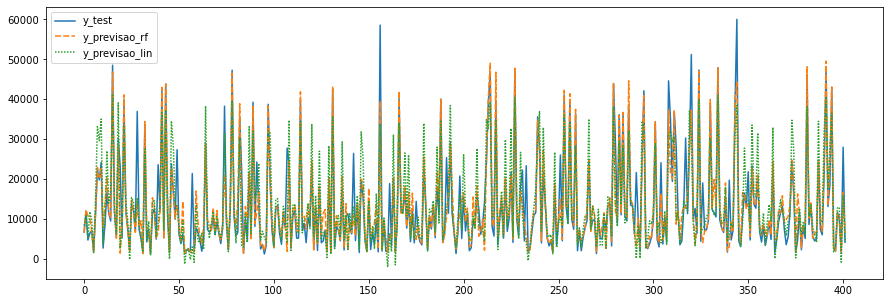

,y_test,y_previsao_rf,y_previsao_lin
0,6664.68595,6515.487508,8281.243818
1,11837.16000,12271.966730,10949.083321
2,4661.28635,10695.013674,4945.583920
3,6373.55735,10319.621981,11754.021964
4,6986.69700,6874.118971,9644.031763
...,...,...,...
397,11658.37915,11391.620600,12683.074101
398,9583.89330,10767.104488,12884.734173
399,1832.09400,1779.878964,-890.186004
400,27941.28758,16540.738808,15924.571269


In [129]:
df_resultado = pd.DataFrame()
#df_resultado.index = x_test
df_resultado['y_test'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

In [130]:
x['charges'] = y
display(x)

,age,sex,bmi,children,smoker,reg_southwest,reg_southeast,reg_northwest,reg_northeast,charges
0,19,1,27.900,0,1,1,0,0,0,16884.92400
1,18,0,33.770,1,0,0,1,0,0,1725.55230
2,28,0,33.000,3,0,0,1,0,0,4449.46200
3,33,0,22.705,0,0,0,0,1,0,21984.47061
4,32,0,28.880,0,0,0,0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,0,1,0,10600.54830
1334,18,1,31.920,0,0,0,0,0,1,2205.98080
1335,18,1,36.850,0,0,0,1,0,0,1629.83350
1336,21,1,25.800,0,0,1,0,0,0,2007.94500


In [131]:
x.to_csv('data_deploy.csv', index=False)